In [1]:
#Import needed packages

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate inputs
x = torch.linspace(-1, 1, 1000).view(-1, 1)  # Choose a range to capture several periods of the sine function

# Calculate outputs for the function
y = torch.sign(torch.sin(5 * np.pi * x))

# Dataset and DataLoader
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
# Dnn1 
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the model
model1 = DNN1().to(device)

In [ ]:
# Loss function
criterion = nn.MSELoss()

# Optimizers
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

In [4]:
# Train Model with Gradient Norm Recording
def train_model_with_grad_norm(model, optimizer, dataloader, epochs=1000):
    model.train()
    losses = [] 
    grad_norms = []  
    for epoch in range(epochs):
        epoch_losses = []
        epoch_grad_norms = []
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            
            # Calculate gradient norm
            grad_all = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    grad = (p.grad.cpu().data.numpy() ** 2).sum()
                    grad_all += grad
            grad_norm = grad_all ** 0.5
            
            optimizer.step()
            
            epoch_losses.append(loss.item())
            epoch_grad_norms.append(grad_norm)
            
        epoch_loss = sum(epoch_losses) / len(epoch_losses) 
        epoch_grad_norm = sum(epoch_grad_norms) / len(epoch_grad_norms)  
        losses.append(epoch_loss)
        grad_norms.append(epoch_grad_norm)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Grad Norm: {epoch_grad_norm}')
        
    return losses, grad_norms

# Train the model
print("Training Model with Gradient Norm Recording")
losses_model1, grad_norms_model1 = train_model_with_grad_norm(model1, optimizer1, dataloader)

Training Model with Gradient Norm Recording
Epoch 1, Loss: 0.9823893550783396, Grad Norm: 0.8657111603615525
Epoch 2, Loss: 0.9682385977357626, Grad Norm: 0.9240918811158874
Epoch 3, Loss: 0.9661993235349655, Grad Norm: 0.8833379306744668
Epoch 4, Loss: 0.9598401635885239, Grad Norm: 0.7838242375139783
Epoch 5, Loss: 0.9655578415840864, Grad Norm: 0.8497516962146376
Epoch 6, Loss: 0.9578347206115723, Grad Norm: 0.8110977049295445
Epoch 7, Loss: 0.9425581078976393, Grad Norm: 0.6669636791103375
Epoch 8, Loss: 0.9415250439196825, Grad Norm: 0.9860788638134188
Epoch 9, Loss: 0.9409910105168819, Grad Norm: 0.9441670287381432
Epoch 10, Loss: 0.9346906617283821, Grad Norm: 0.8724251722107413
Epoch 11, Loss: 0.9225924648344517, Grad Norm: 0.8237093984594722
Epoch 12, Loss: 0.9197682924568653, Grad Norm: 0.8360624125703104
Epoch 13, Loss: 0.916100176051259, Grad Norm: 1.0456433111084573
Epoch 14, Loss: 0.9054573345929384, Grad Norm: 0.916989513792725
Epoch 15, Loss: 0.9046317134052515, Grad No

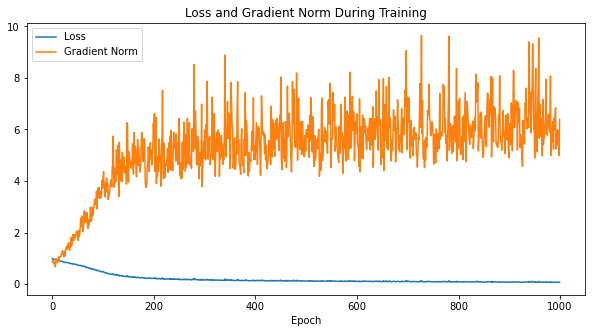

In [6]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(losses_model1, label='Loss')
plt.plot(grad_norms_model1, label='Gradient Norm')
plt.xlabel('Epoch')
plt.title('Loss and Gradient Norm During Training')
plt.legend()
plt.show()